In [1]:
import sys
import os
from time import time
sys.path.append("../../../../src/")
#Imports
import single_particle_sector as sps
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter

In [2]:
#Define Parameters
J = 1
L = 100
h_i = np.linspace(0,2,100)
n = [1,2,3,4,5,6]



In [3]:
I_n_h = []
for ni in n:
    I_n = []
    for h in h_i:
        H = sps.H_bdg(h,L,J,"ABC")
        E,V = la.eigh(H)
        #The only sublety is this step
        #G_TFIM chooses ((1 0),(0 0 )) correlation structure (Ground states only)
        G = sps.G_tfim(V[:,L:])
        x = sps.P_n(ni,G,L)
        y = sps.P_n(2*ni,G,L)
        I_n.append(np.log(y/(x*x)))
        
        #I_n.append(x)
    I_n_h.append(I_n)
I_n_h = np.array(I_n_h)

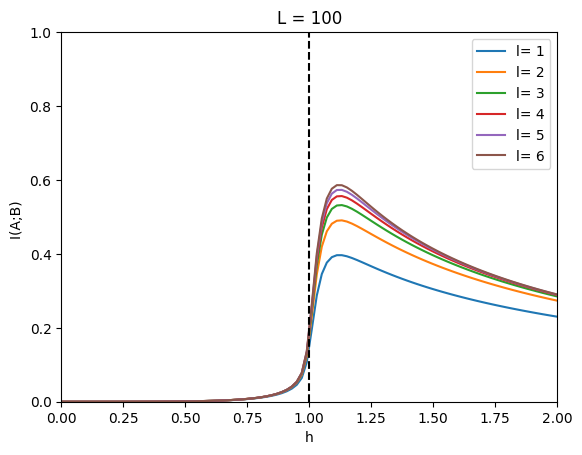

In [5]:
for i in range(len(n)):
    plt.plot(h_i, I_n_h[i,:],label =f"l= {n[i]}")
plt.legend()
plt.xlim(h_i[0],h_i[-1])
plt.ylim([0,1])
plt.xlabel("h")
plt.ylabel("I(A;B) ")
plt.title(f"L = {L}")
plt.vlines(1,0,1, color = "black", linestyles="--")

In [136]:
L = 20
h = 0
J = 1
H = sps.H_bdg(h,L,J,"ABC")
E,V = la.eigh(H)
G = sps.G_tfim(V[:,L:])
ns = np.arange(1,20)


In [137]:
times = []
for n in ns:

    timer = time()
    sps.P_n(n,G,L)
    times.append(time()-timer)


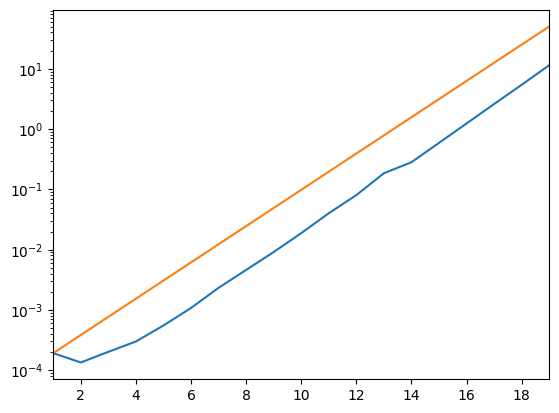

In [150]:
plot(ns,times)
ns = np.array(ns)
plot(ns,times[0]/2*2**ns)
plt.xlim(ns[0],ns[-1])
#plt.xscale("log")
plt.yscale("log")